# **Import Library**

In [1]:
# Kode
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **Data Preparation**

## **Muat Data**

In [2]:
# Kode
path = kagglehub.dataset_download("mathchi/churn-for-bank-customers")

In [3]:
# Kode
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Arcleid\.cache\kagglehub\datasets\mathchi\churn-for-bank-customers\versions\1


In [4]:
# Kode
df = pd.read_csv(f"{path}/churn.csv")

In [5]:
# Kode
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **EDA**

In [7]:
# Kode
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Kode
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


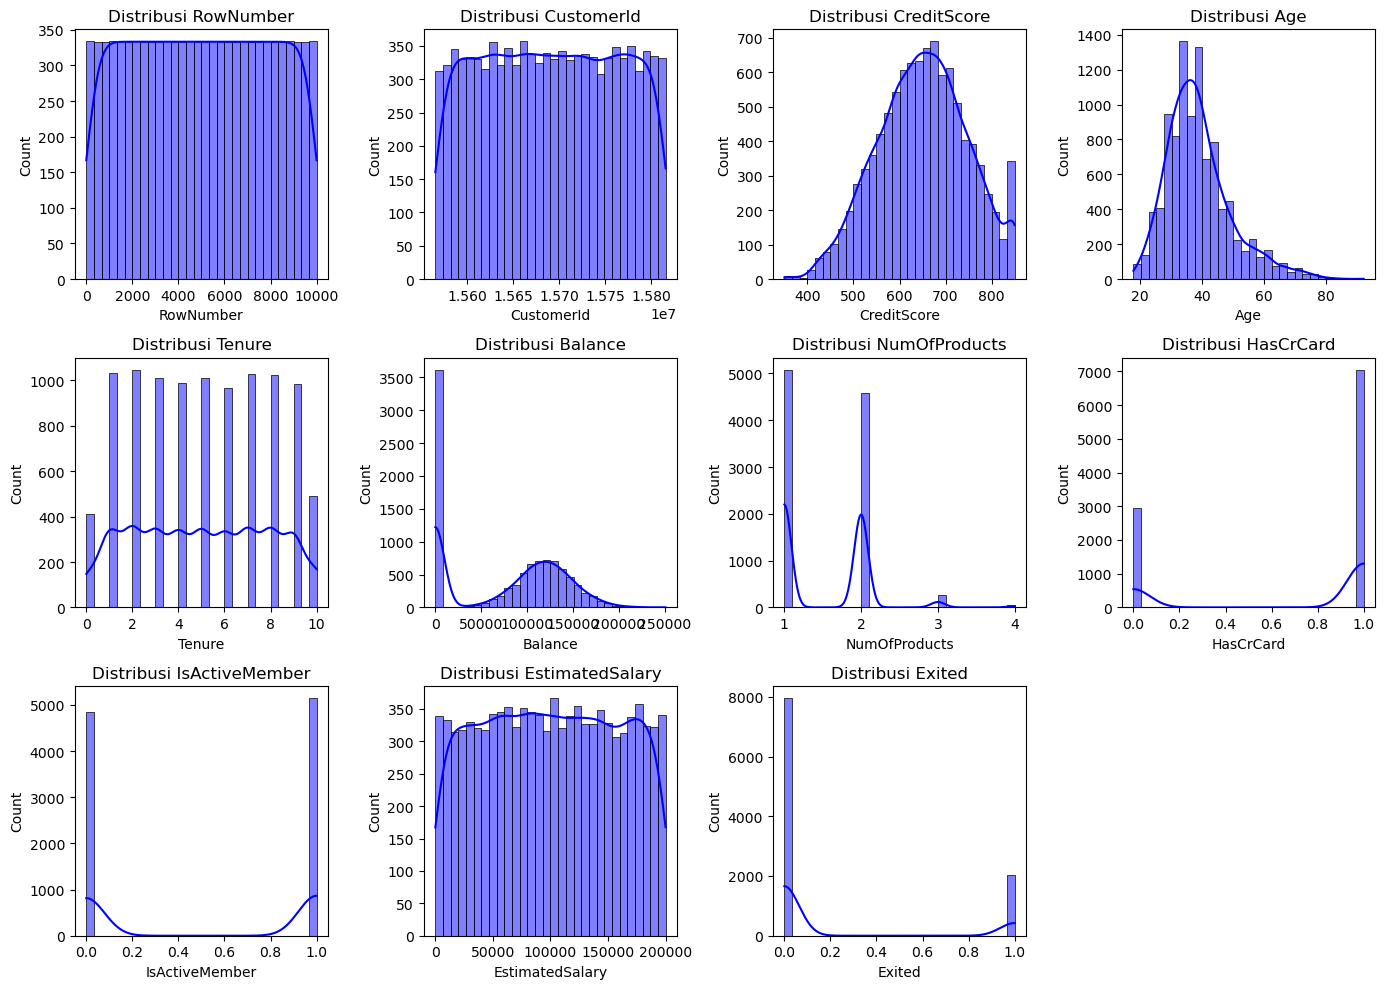

In [9]:
# Kode
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

C:\Users\Arcleid\AppData\Local\Temp\ipykernel_3524\1244991301.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
C:\Users\Arcleid\AppData\Local\Temp\ipykernel_3524\1244991301.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
C:\Users\Arcleid\AppData\Local\Temp\ipykernel_3524\1244991301.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


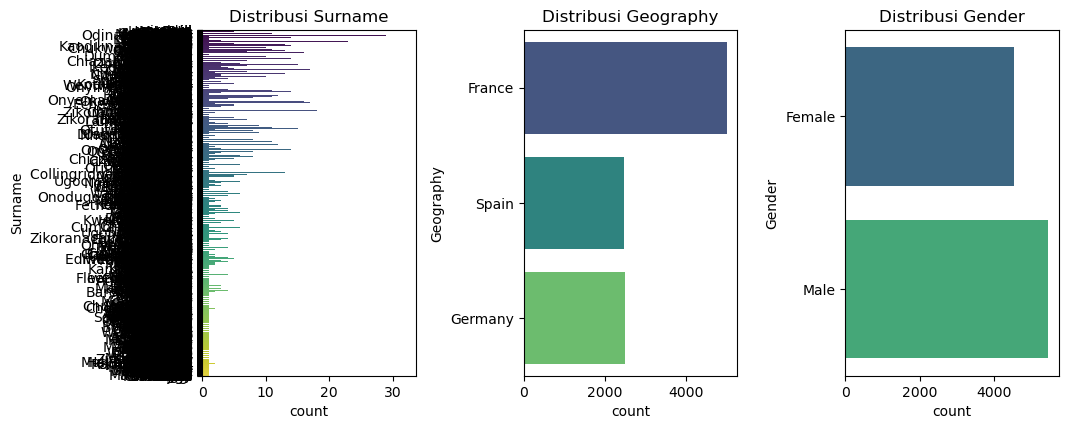

In [10]:
# Kode
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

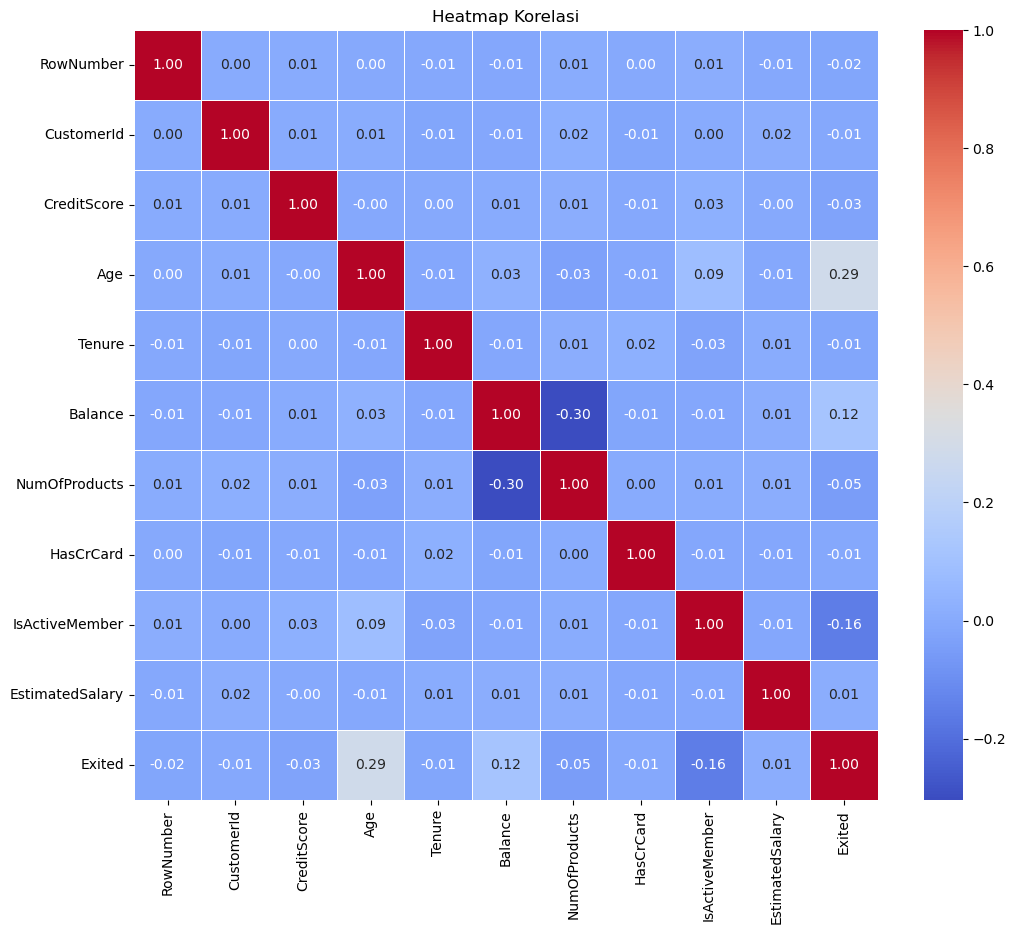

In [11]:
#kode
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

C:\Users\Arcleid\AppData\Local\Temp\ipykernel_3524\1173846123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='viridis')


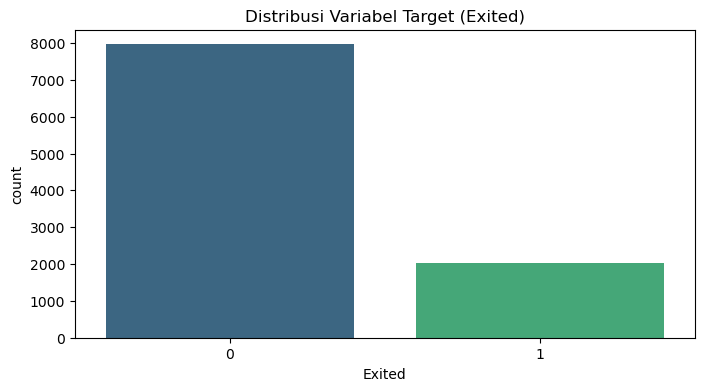

In [12]:
#Kode
plt.figure(figsize=(8, 4))
sns.countplot(x='Exited', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Exited)')
plt.show()

# **Data Splitting**

In [13]:
# Kode
df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=7)
print(f"Train/Validation: {len(df_train_val)}, Test: {len(df_test)}")

df_train, df_val = train_test_split(df_train_val, test_size=0.25, random_state=7)
print(f"Train: {len(df_train)}, Validation: {len(df_val)}, Test: {len(df_test)}")

X_train, y_train = df_train.drop(columns=['Exited']), df_train['Exited']
X_val, y_val = df_val.drop(columns=['Exited']), df_val['Exited']
X_test, y_test = df_test.drop(columns=['Exited']), df_test['Exited']

Train/Validation: 8000, Test: 2000
Train: 6000, Validation: 2000, Test: 2000


# **Preprocessing**

## **Feature Scaling**

In [14]:
# Kode
# Buat instance Feature Scaling menggunakan StandardScaler
scaler = StandardScaler()


# Identifikasi kolom numerik (kecuali target)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('Exited')


# Fit scaler hanya ke train
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])


# Transform val dan test dengan parameter scaler dari train
df_val[numeric_columns] = scaler.transform(df_val[numeric_columns])
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])


# Pisahkan fitur (X) dan target (y)
X_train, y_train = df_train.drop(columns=['Exited']), df_train['Exited']
X_val, y_val = df_val.drop(columns=['Exited']), df_val['Exited']
X_test, y_test = df_test.drop(columns=['Exited']), df_test['Exited']


# Verifikasi hasil scaling
print("Mean fitur numerik (seharusnya ~0):")
print(X_train[numeric_columns].mean().round(3))
print("\nStandard deviation fitur numerik (seharusnya ~1):")
print(X_train[numeric_columns].std().round(3))

Mean fitur numerik (seharusnya ~0):
RowNumber          0.0
CustomerId         0.0
CreditScore       -0.0
Age               -0.0
Tenure            -0.0
Balance            0.0
NumOfProducts     -0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
dtype: float64

Standard deviation fitur numerik (seharusnya ~1):
RowNumber          1.0
CustomerId         1.0
CreditScore        1.0
Age                1.0
Tenure             1.0
Balance            1.0
NumOfProducts      1.0
HasCrCard          1.0
IsActiveMember     1.0
EstimatedSalary    1.0
dtype: float64


## **One-Hot Encoder**

In [15]:
# Kode
categorical_columns = ['Geography', 'Gender']

categorical_columns = ['Geography', 'Gender']

ohe = OneHotEncoder(
    categories=[                            # tentukan semua kategori untuk setiap fitur
        df['Geography'].unique().tolist(),  # semua kategori Geography
        df['Gender'].unique().tolist()      # semua kategori Gender
    ],
    handle_unknown="ignore",  # penting agar tidak error kalau ada kategori baru,
    sparse_output=False       # agar hasilnya array, bukan sparse matrix
)

ohe.fit(X_train[categorical_columns])

X_train_encoded = ohe.transform(X_train[categorical_columns])
X_val_encoded = ohe.transform(X_val[categorical_columns])
X_test_encoded = ohe.transform(X_test[categorical_columns])

encoded_columns = ohe.get_feature_names_out(categorical_columns)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=encoded_columns, index=X_val.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

X_train = pd.concat([X_train[numeric_columns], X_train_encoded_df], axis=1)
X_val = pd.concat([X_val[numeric_columns], X_val_encoded_df], axis=1)
X_test = pd.concat([X_test[numeric_columns], X_test_encoded_df], axis=1)

X_train[encoded_columns].head()


,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
1433,1.0,0.0,0.0,0.0,1.0
3212,1.0,0.0,0.0,0.0,1.0
4314,1.0,0.0,0.0,0.0,1.0
1855,1.0,0.0,0.0,1.0,0.0
6926,1.0,0.0,0.0,0.0,1.0


# **Modeling**

## **Baseline Model**

### KNN

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1608
           1       0.66      0.34      0.45       392

    accuracy                           0.84      2000
   macro avg       0.76      0.65      0.68      2000
weighted avg       0.82      0.84      0.81      2000



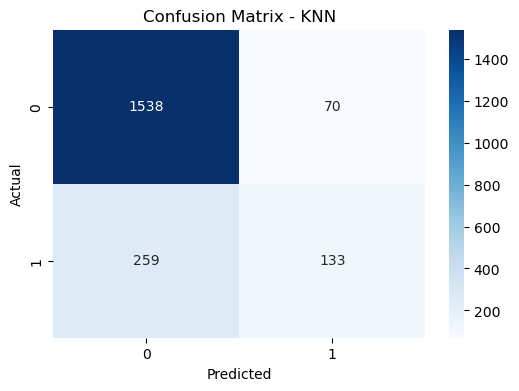

In [16]:
# Kode
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_val)

print("KNN Classification Report:")
print(classification_report(y_val, y_pred_knn))

cm_knn = confusion_matrix(y_val, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### SVM

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1608
           1       0.80      0.34      0.48       392

    accuracy                           0.85      2000
   macro avg       0.83      0.66      0.70      2000
weighted avg       0.85      0.85      0.83      2000



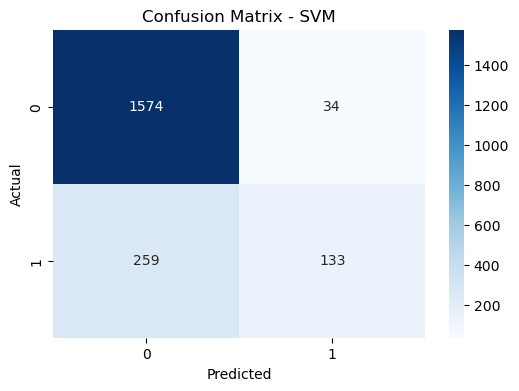

In [17]:
# Kode
# Latih SVM pada training set
svm = SVC()
svm.fit(X_train, y_train)


# Evaluasi pada validation set
y_pred_svm = svm.predict(X_val)


# Evaluasi menggunakan classification report
print("SVM Classification Report:")
print(classification_report(y_val, y_pred_svm))


# Confusion Matrix
cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Hyperparameter Tuning

### KNN Hyperparameter Tuning

In [18]:
# Kode

# Definisikan grid hyperparameter untuk KNN yang akan dicoba
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50],
    'p': [1, 2] 
}


# Inisialisasi GridSearchCV (akan melakukan CV untuk tiap kombinasi parameter)
grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    verbose=3
)


# Jalankan pencarian parameter pada data train
grid_knn.fit(X_train, y_train)


# Print parameter terbaik yang ditemukan
print(f"\nBest KNN parameters: {grid_knn.best_params_}")

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV 1/5] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.823 total time=   0.2s
[CV 2/5] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.818 total time=   0.2s
[CV 3/5] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.811 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.811 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.812 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.822 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.818 total time=   0.1s
[CV 3/5] END algorithm=a

Tuned KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1608
           1       0.69      0.27      0.39       392

    accuracy                           0.83      2000
   macro avg       0.77      0.62      0.65      2000
weighted avg       0.81      0.83      0.80      2000



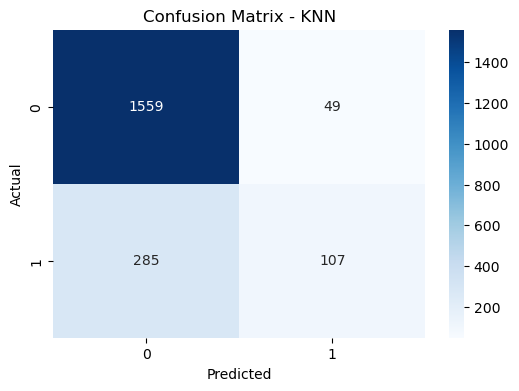

In [19]:
# Kode
# Latih ulang KNN menggunakan parameter terbaik dari GridSearch
best_knn = KNeighborsClassifier(**grid_knn.best_params_)
best_knn.fit(X_train, y_train)


# Prediksi pada validation set dan tampilkan metrik setelah tuning
y_pred_knn = best_knn.predict(X_val)


print("Tuned KNN Classification Report:")
print(classification_report(y_val, y_pred_knn))


# Visualisasikan confusion matrix untuk model KNN yang sudah dituning
cm_knn = confusion_matrix(y_val, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### SVM Hyperparameter Tuning

In [20]:
# Kode
# Definisikan grid hyperparameter untuk SVM
param_grid_svm = {
    'C': [0.1, 1, 2, 5],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4], 
    'class_weight': [None, 'balanced']
}

# Inisialisasi GridSearchCV untuk SVM
grid_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svm,
    verbose=3
)


# Jalankan pencarian parameter pada data train
grid_svm.fit(X_train, y_train)


# Print parameter terbaik hasil tuning
print(f"\nBest SVM parameters: {grid_svm.best_params_}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=rbf;, score=0.811 total time=   2.5s
[CV 2/5] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=rbf;, score=0.810 total time=   2.7s
[CV 3/5] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=rbf;, score=0.814 total time=   2.8s
[CV 4/5] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=rbf;, score=0.809 total time=   2.4s
[CV 5/5] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=rbf;, score=0.808 total time=   2.5s
[CV 1/5] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=poly;, score=0.839 total time=   2.6s
[CV 2/5] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=poly;, score=0.827 total time=   2.4s
[CV 3/5] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=poly;, score=0.829 total time=   2.5s
[CV 4/5] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=poly;, score=0.82

Tuned SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1608
           1       0.78      0.36      0.49       392

    accuracy                           0.85      2000
   macro avg       0.82      0.67      0.70      2000
weighted avg       0.85      0.85      0.83      2000



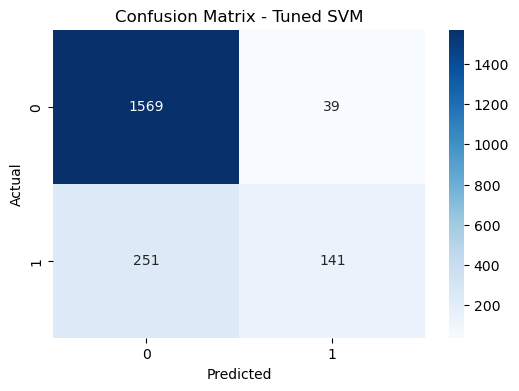

In [21]:
# Kode
# Latih SVM menggunakan parameter terbaik dari GridSearch
best_svm = SVC(**grid_svm.best_params_)
best_svm.fit(X_train, y_train)


# Evaluasi performa SVM yang sudah dituning pada validation set
y_pred_svm = best_svm.predict(X_val)


print("Tuned SVM Classification Report:")
print(classification_report(y_val, y_pred_svm))


# Visualisasikan confusion matrix untuk SVM yang sudah dituning
cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## **Perbandingan Model**

In [22]:
# Kode
# Fungsi util untuk mengevaluasi model dan mengembalikan metrik sebagai dictionary
def evaluate_model(model, X_test, y_test):
    # Prediksi label
    y_pred = model.predict(X_test)
    # Buat confusion matrix dan ekstrak TN, FP, FN, TP
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results


# Evaluasi setiap model (baseline dan tuned) pada validation set
results = {
    'KNN (Baseline)': evaluate_model(knn, X_val, y_val),
    'KNN (Tuned)': evaluate_model(best_knn, X_val, y_val),
    'SVM (Baseline)': evaluate_model(svm, X_val, y_val),
    'SVM (Tuned)': evaluate_model(best_svm, X_val, y_val)
}


# Buat DataFrame ringkasan metrik untuk memudahkan perbandingan
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': round(metrics['Accuracy'], 2),
        'Precision': round(metrics['Precision'], 2),
        'Recall': round(metrics['Recall'], 2),
        'F1-Score': round(metrics['F1-Score'], 2)
    })


summary_df = pd.DataFrame(rows)


# Tampilkan ringkasan performa model
print("Perbandingan Perfoma Model:")
print(summary_df)

Perbandingan Perfoma Model:
            Model  Accuracy  Precision  Recall  F1-Score
0  KNN (Baseline)      0.84       0.66    0.34      0.45
1     KNN (Tuned)      0.83       0.69    0.27      0.39
2  SVM (Baseline)      0.85       0.80    0.34      0.48
3     SVM (Tuned)      0.85       0.78    0.36      0.49


<Figure size 1200x800 with 0 Axes>

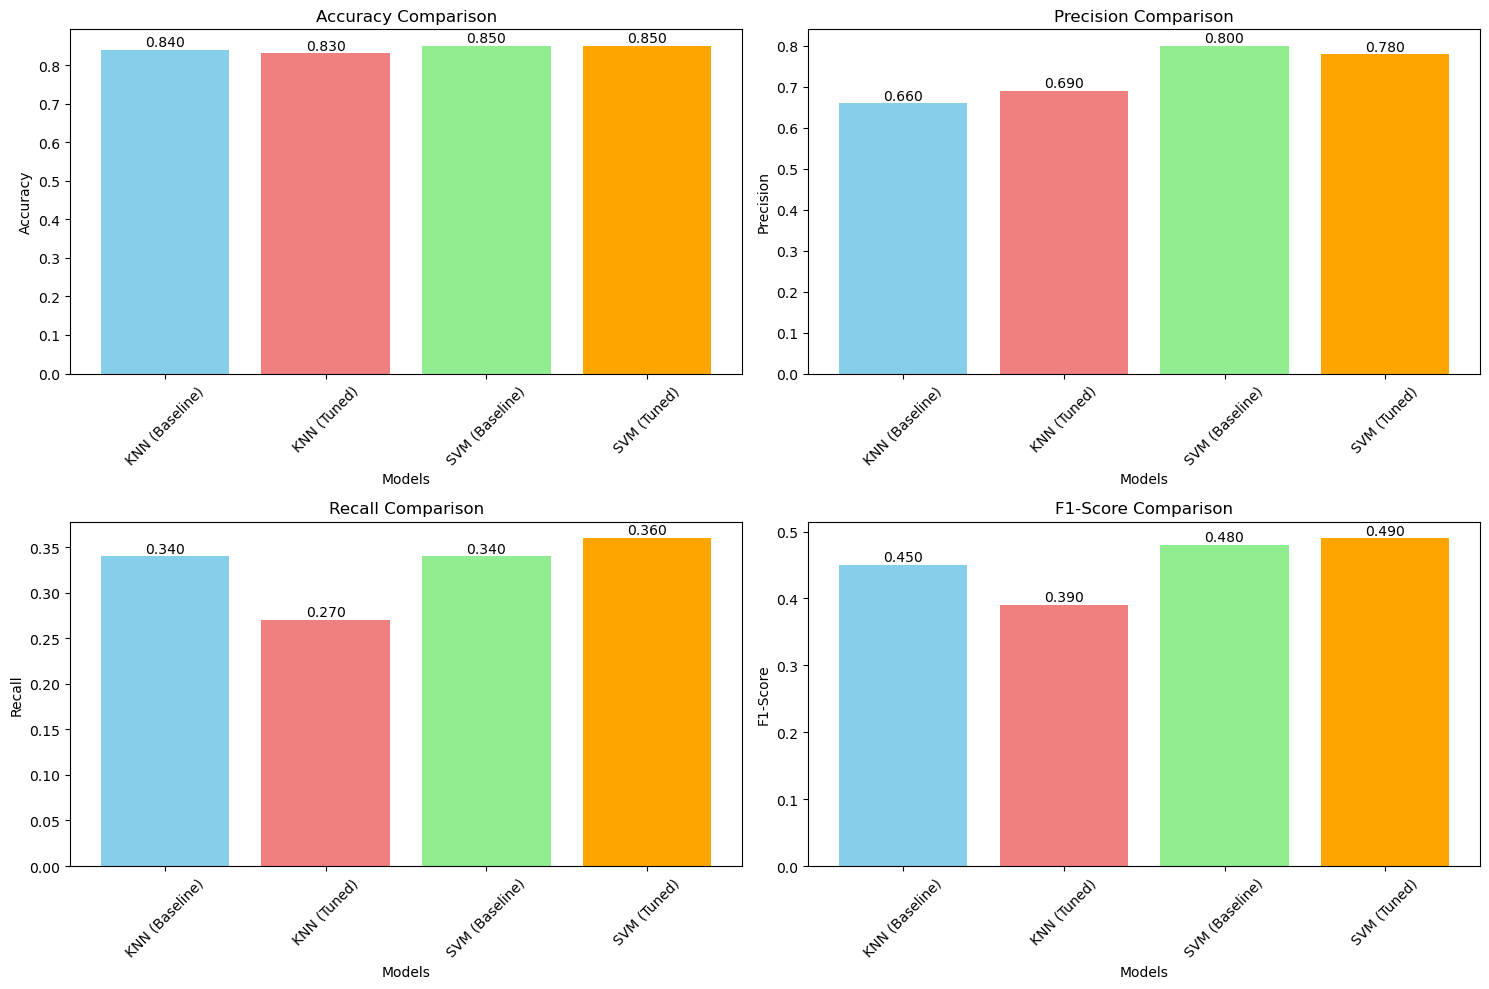

In [23]:
# Kode
# Visualisasikan perbandingan metrik antar model menggunakan bar chart
plt.figure(figsize=(12, 8))


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()


for i, metric in enumerate(metrics):
    ax = axes[i]
    # Buat bar chart untuk tiap metric
    bars = ax.bar(summary_df['Model'], summary_df[metric], 
                  color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_xlabel('Models')
    ax.tick_params(axis='x', rotation=45)
    
    # Tambahkan label nilai di atas tiap bar untuk kejelasan
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{height:.3f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

# **Final Model**

Performa Model SVM Final pada Data Test:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1589
           1       0.80      0.40      0.53       411

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



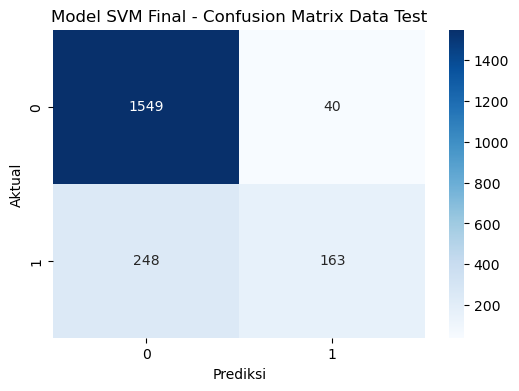

In [24]:
# Kode
# Gabungkan data train dan validasi untuk pelatihan model final
X_train_final = pd.concat([X_train, X_val])
y_train_final = pd.concat([y_train, y_val])


# Latih ulang model SVM terbaik menggunakan gabungan data train+val
final_svm = SVC(**grid_svm.best_params_)
final_svm.fit(X_train_final, y_train_final)


# Evaluasi performa pada data test
y_pred_final = final_svm.predict(X_test)


print("Performa Model SVM Final pada Data Test:")
print(classification_report(y_test, y_pred_final))


# Visualisasi confusion matrix pada data test
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues')
plt.title('Model SVM Final - Confusion Matrix Data Test')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

